**Question 1**: Do different segment groups tend to visit stores in varying divisions, states, etc.?

**Datasets Used**: STORE_LOOKUP and DRIVER_LOOKUP

**Methods Used**: Standard Merge

**Outline**: The first thing to do is to merge the two datasets. Once we create a new dataset, then we can begin to count the number of stores visited for each segment group. Since the driver could visit the same store twice, we filter by unique stores and display the data using a bar chart.

**Findings**: Customers in the "No Discount" segment are more likely to visit unique stores over those in the "Small Discount" segment.

**Recommendations**: The underlying issue may be that the current discount program isn’t appealing or motivating enough for drivers to remain loyal to specific stores. As a solution, Love's could engage drivers using its loyalty program and provide points based on the amount of unique stores that they visit.

**Question 2:** Does the driver’s age influence the number of gallons they fuel in a month?

**Datasets Used**: DRIVER_MONTHLY_PRODUCT_SALES and DRIVER_LOOKUP

**Outline**: First, we merge the two datasets, then drop the unecessary columns. Then we set filter data to include only rows where CG_DEPARTMENT_DESC is "Fuel". To get the driver's age, we extract the year from the BIRTHDATE column and create a new column called "BIRTHYEAR", so that we can subtract the driver's birthyear from the current year (2024). We put this value in a new column and group the ages by categories, we then group by the ages and calculate the average SALESTOTAL and display the data.

**Findings**: Drivers who are in their 60's tend to purchase more fuel than other age groups, while those in their 40's tend to purchase the least amount of fuel (on average).

**Recommendations**: Drivers in their 40s may be purchasing less fuel due to economic factors, route differences, or lack of engagement. To fix this issue, Love's could offer promotions for mid-career drivers, such as reduced fuel prices after a certain number of gallons. Additionally, if drivers in their 40s have families, incentivize with benefits that resonate, such as gift cards or discounts for family-related purchases (e.g., meals or accommodations).

In [ ]:
# Alexander Bharucha - Group 3
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# import pandas

import pandas as pd

# read csv for driver lookup
driver_lookup = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/DRIVER_LOOKUP.csv')

# read csv for monthly product sales
driver_monthly_product_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/DRIVER_MONTHLY_PRODUCT_SALES.csv')

# read csv for store lookup
store_lookup = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/STORE_LOOKUP.csv')

import statistics as stats
median = stats.median(driver_monthly_product_sales['SALESTOTAL'])
print(median)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
25.95


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Inspect the data (optional)
print(driver_lookup.head())
print(driver_monthly_product_sales.head())

# Merge the datasets on the 'driver_id' column
merged_data = pd.merge(driver_monthly_product_sales, driver_lookup, on='DRIVER_ID')

# Now group by 'SEGMENT_GROUP' and calculate the number of unique divisions
unique_divisions_by_segment = merged_data.groupby('SEGMENT_GROUP')['division'].nunique().reset_index(name='unique_divisions_count')

# Debugging: Print the result to check the output
print(unique_divisions_by_segment)

# Optional: Plotting the result as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(unique_divisions_by_segment['SEGMENT_GROUP'], unique_divisions_by_segment['unique_divisions_count'], color='skyblue')
plt.title('Unique Number of Divisions Visited by Each Segment Group', fontsize=16)
plt.xlabel('Segment Group', fontsize=12)
plt.ylabel('Unique Divisions Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   DRIVER_ID  MOSTVISITEDSTORE           CITY           STATE ZIPCODE  \
0     218443               798       Monmouth        Illinois   61462   
1      16981               242         laredo           Texas   78045   
2       1764               298         Temple           Texas   76502   
3     321572               398     west point     Mississippi   39773   
4     335238               352  fuquay varina  North Carolina   27526   

    BIRTHDATE MEMBERSINCE LASTFUELTRANSACTIONMONTH LASTMERCHTRANSACTIONMONTH  \
0  1976-09-13  12/30/2021                7/31/2024                 7/31/2024   
1  1966-01-11    5/5/2018                7/31/2024                 7/31/2024   
2  1995-07-20   1/29/2023                7/31/2024                 7/31/2024   
3  1976-03-19    6/8/2021                7/31/2024                 7/31/2024   
4  1963-07-13    3/9/2023                7/31/2024                 7/31/2024   

  LASTTRUCKCAREVISIT   SEGMENTGROUP  APPUSERIND LASTAPPMONTH DEVICETYPE  \
0    

KeyError: 'SEGMENT_GROUP'

  AGE_GROUP    SALESTOTAL
0       20s  1.584735e+08
1       30s  5.270730e+08
2       40s  5.270304e+08
3       50s  5.336846e+08
4       60s  2.619597e+08


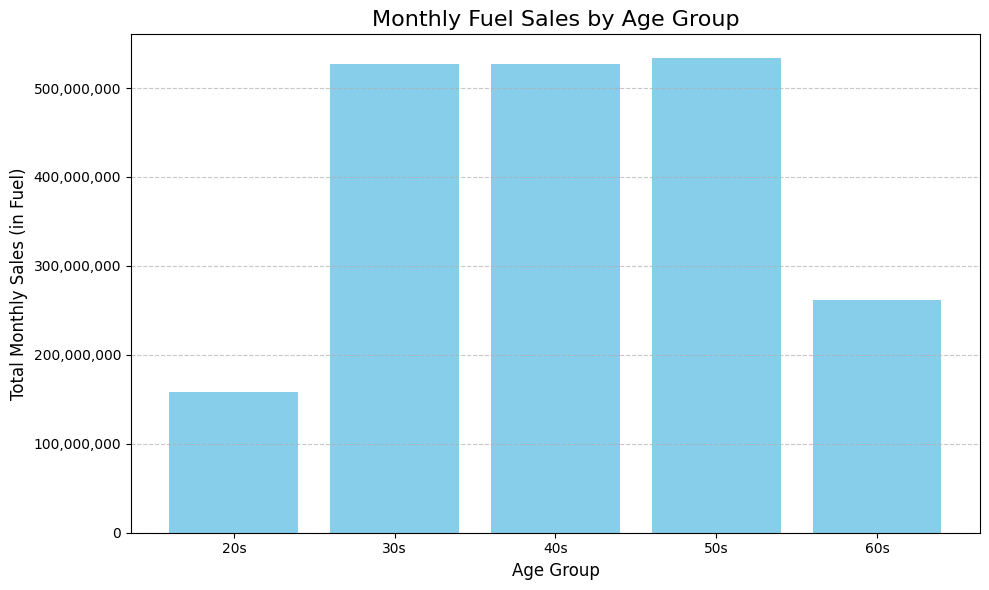

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Add age column to driver_lookup
current_year = datetime.now().year
driver_lookup['AGE'] = current_year - pd.to_datetime(driver_lookup['BIRTHDATE']).dt.year

# Define age groups
def age_group(age):
    if 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    else:
        return 'Others'

driver_lookup['AGE_GROUP'] = driver_lookup['AGE'].apply(age_group)

# Merge the two datasets on DRIVER_ID
merged_data = pd.merge(driver_monthly_product_sales, driver_lookup, on='DRIVER_ID', how='inner')

# Convert SALESTOTAL to numeric
merged_data['SALESTOTAL'] = pd.to_numeric(merged_data['SALESTOTAL'], errors='coerce')

# Filter for Fuel product type
fuel_sales = merged_data[merged_data['PRODUCTTYPE'] == 'Fuel']

# Group by age group and calculate total sales
sales_by_age_group = fuel_sales.groupby('AGE_GROUP')['SALESTOTAL'].sum().reset_index()

# Debugging: Print the aggregated data
print(sales_by_age_group)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sales_by_age_group['AGE_GROUP'], sales_by_age_group['SALESTOTAL'], color='skyblue')
plt.title('Monthly Fuel Sales by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Monthly Sales (in Fuel)', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Format large numbers
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
